# Assignment 1a


In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (7,5)

## Exercise 1.1
For $dJ/db$,
$$
\begin{aligned}
\frac{dJ}{db} = \frac{1}{n}\sum_{i = 1}^n \frac{\partial J}{\partial z_i}\frac{dz_i}{db},
\end{aligned}
$$
and for $dJ/dw_j$,
$$
\begin{aligned}
\frac{dJ}{dw_j} = \frac{1}{n}\sum_{i = 1}^n \frac{\partial J}{\partial z_i}\frac{d z_i}{d w_j}
\end{aligned}
$$

## Exercise 1.2

$$
\begin{aligned}
\frac{\partial J}{\partial z_i} & = \frac{1}{n}\left( -y_i \frac{\partial}{\partial z_i}\left( \ln \frac{1}{1 + e^{-z_i}}\right) - (1 - y_i)\frac{\partial}{\partial z_i}\left( \ln \frac{e^{-z_i}}{1 + e^{-z_i}}\right)\right) \nonumber \\
&= \frac{1}{n}\left( y_i \frac{1}{1+e^{-z_i}} \frac{\partial}{\partial z_i}e^{-z_i} - (1-y_i)\left( \frac{\partial}{\partial z_i} \ln e^{-z_i} - \frac{\partial}{\partial z_i} \ln \big(1 + e^{-z_i}\big)\right)\right) \nonumber \\
&=\frac{1}{n}\left(-y_i \frac{e^{-z_i}}{1+e^{-z_i}} + (1-y_i)\left(1 - \frac{e^{-z_i}}{1 + e^{-z_i}} \right)\right) \nonumber \\
&=\frac{1}{n}\left(\frac{e^{-z_i}}{1+e^{-z_i}} \big(-y_i - (1-y_i) \big) + (1-y_i) \big)\right) = \frac{1}{n} \left( - \frac{e^{-z_i}}{1 + e^{-z_i}} + 1 - y_i \right) \nonumber \\
&= \frac{1}{n}\left( - \left( 1 - \frac{1}{1+e^{-z_i}} \right) + 1 -y_i \right) = \frac{1}{n}\left( \frac{1}{1+e^{-z_i}} - y_i\right).
\end{aligned}
$$

Next, 

$$
\begin{aligned}
\frac{d z_i}{d b} = \left[ \frac{\partial}{\partial b} \left(\mathbf{w}^T\mathbf{x_1} + b\right),  \ldots, \frac{\partial}{\partial b} \left( \mathbf{w}^T\mathbf{x_n} + b \right) \right] = [1, \ldots , 1].
\end{aligned}
$$

And finally 
$$
\begin{aligned}
\frac{dz_i}{dw_j} = \left[ x_{1j}, x_{2j}, \ldots, x_{nj} \right]
\end{aligned}
$$

## Exercise 1.3

The update steps of the gradient descent will be
$$
\begin{aligned}
w_j := w_j - \eta \frac{1}{n}\sum_{i=1}^n\left( \frac{1}{1+e^{-z_i}} - y_i\right)x_{ij}  \\
b := b - \eta \frac{1}{n}\sum_{i=1}^n\left( \frac{1}{1+e^{-z_i}} - y_i\right)
\end{aligned}
$$

A easier way to go about this is doing all the updates at once, and inserting a column of ones into $x$, which will be the offset. $\mathbf{x}$ is thus $n \times (p+1)$ and $\mathbf{w}$ is $(p+1) \times 1$,
$$
\begin{aligned}
\mathbf{w} = \mathbf{w} - \eta \frac{1}{n}\mathbf{x}^T\left( \frac{1}{1+e^{-\mathbf{z}}} - \mathbf{y} \right)
\end{aligned}
$$

In [2]:
class log_reg:
    def __init__(self, step_size = 0.01, epochs = 10000, random_init = False):
        self.step_size = step_size
        self.epochs = epochs
        self.random_init = random_init
        
    def z(self, X, w):
        """
        Computes the linear transformation which is the input
        of the sigmoid function.
        """
        return(np.dot(X, w))
    
    def sigmoid(self, z):
        """
        Computes the sigmoid function 
        """
        return(1/(1+np.exp(-z)))
    # equation 1d
    def loss(self, h, y):
        """
        Cross entropy loss
        """
        return((-y * np.log(h) - (1-y) * np.log(1-h)).mean())
    
    def add_intercept(self, X):
        """
        Inserts a columns of 1's into matrix X to account
        for the intercept (offset)
        """
        intercept = np.ones((X.shape[0], 1))
        return(np.concatenate((intercept, X), axis = 1))
    
    def fit(self, X, y):
        """
        Fits a logistic regression
        """
        X = self.add_intercept(X)
        loss = np.zeros(self.epochs)

        if not self.random_init:
            self.w = np.zeros(X.shape[1]).reshape(X.shape[1],1)
        elif self.random_init:
            self.w = np.random.rand(X.shape[1]).reshape(X.shape[1],1)
        
        for i in range(self.epochs):
            z = np.dot(X, self.w)
            h = self.sigmoid(z)

            gradient = np.dot(X.T, (h-y)) / y.size

            self.w -= self.step_size * gradient     
            
            z = np.dot(X, self.w)
            h = self.sigmoid(z)
            loss[i] = self.loss(h, y)
        
        return loss
    
    def predict(self, X, p_cutoff = .5):
        X = self.add_intercept(X)
        predicted_prob = self.sigmoid(np.dot(X, self.w))
        return(predicted_prob >= p_cutoff)


The ```log_reg``` class can be used to fit a logistic regression. Below is a small test to see that it works.

In [3]:
np.random.seed(12)
mean_vec = [1, 5, 3]
cov_mat = np.diag([2.2, 15.3, 82.5])
n = 100
# as defined in the task, the complete datamatrix is p x n rather than n x p
x = np.random.multivariate_normal(mean_vec, cov_mat, n)
coefs = np.array([2, -1.2, 0.5]).reshape(3,1)

z = 5 + np.matmul(x , coefs)
p = 1/(1 + np.exp(-z))
y = np.random.binomial(1, p.flatten(), n).reshape(100, 1)

In [4]:
model_test = log_reg(step_size = .1, epochs = 10000)
model_test.fit(x, y.reshape(100, 1))

pred = model_test.predict(x)*1
(pred == y).mean()

0.93

So this model predicts 93% of the observations correctly.

# Exercise 1.4

Now I will use the created class on the provided biopsy data.

In [5]:
import numpy as np
import pandas as pd

def load_biopsy():
    # import data
    biopsy = pd.read_csv('biopsy.csv', na_values='?', dtype={'ID': str}).dropna().reset_index()
    
    # Split in training and test data
    trainI = np.random.choice(biopsy.shape[0], size=300, replace=False)    
    trainIndex=biopsy.index.isin(trainI)    
    train=biopsy.iloc[trainIndex] # training set
    test=biopsy.iloc[~trainIndex] # test set    
    
    # Extract relevant data features
    X_train = train[['V1','V2','V3','V4','V5','V6','V7','V8','V9']].values
    X_test = test[['V1','V2','V3','V4','V5','V6','V7','V8','V9']].values    
    Y_train=(train['class']=='malignant').astype(int).values.reshape((-1,1))
    Y_test=(test['class']=='malignant').astype(int).values.reshape((-1,1))
    
    return X_train, Y_train, X_test, Y_test

In [6]:
X_train, Y_train, X_test, Y_test = load_biopsy()

In [7]:
model = log_reg(step_size = .01, epochs = 10000)
biopsy_loss = model.fit(X_train, Y_train)

The loss is shown for the first 100 iterations of estimation.

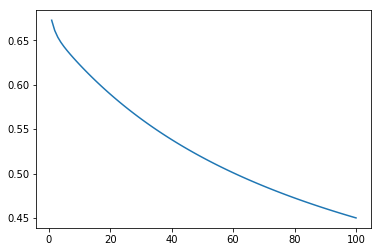

In [8]:
plt.plot(np.linspace(1, 100, 100), biopsy_loss[:100])

In [9]:
pred = model.predict(X_train)*1
(pred == Y_train).mean()

0.9766666666666667

So we have 98.33% correctly classified observations in the training data. Now, on the test data

In [10]:
pred_test = model.predict(X_test)*1
(pred_test == Y_test).mean()

0.9608355091383812

96% observations correctly classified!